# PRACTICA 1



Problema 1
=========

In [2]:
# Load the players statistics

my.player.file <- read.csv("players_stats.csv")

#str(my.player.file)

[1] "Mean height =  197.440758293839"
[1] "Standard deviation =  8.74024994035206"


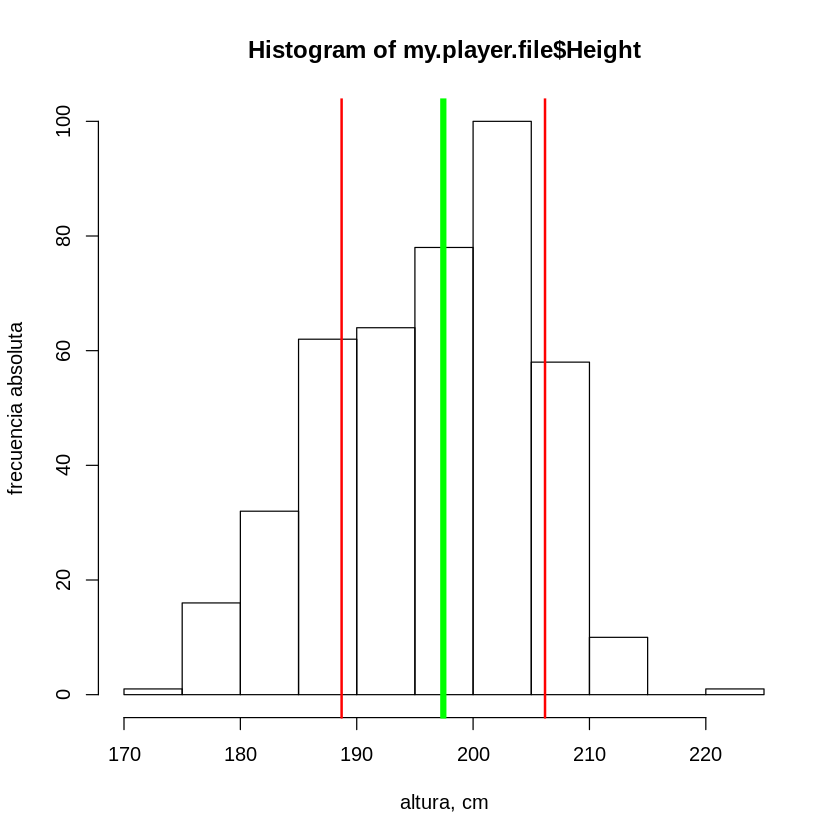

In [9]:
# Plot the height

hist(my.player.file$Height,xlab="altura, cm",ylab="frecuencia absoluta")

mean.height <- mean(my.player.file$Height, na.rm = TRUE)

print(paste("Mean height = ",mean.height))

std.dev <- sd(my.player.file$Height, na.rm = TRUE)

print(paste("Standard deviation = ",std.dev))

abline(v = mean.height, lw = 5, col = "green")
abline(v = mean.height + std.dev, lw = 2, col = "red")
abline(v = mean.height - std.dev, lw = 2, col = "red")



Problema 2
=========

In [3]:
#Load the dataset

ice.daily <- read.csv("N_seaice_extent_daily_v3.0.csv")

In [4]:
# Check in which month it is more frequent to have the minimum and maximum extent

# Extract the vector with the month with the minimum extent each year
minimum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == min(x$Extent)])
}), use.names = FALSE)

# Extract the vector with the month with the maximum extent each year
maximum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == max(x$Extent)])
}), use.names = FALSE)

# A vector of 'labels' for the month
month.vec  <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

# Initializing the vector of frequency for each month
min.month.freq <- numeric(length = 12)
max.month.freq <- numeric(length = 12)

# Transform the vector with the months of minimum extent into a factor
min.month.factor <- (factor(minimum.months))
max.month.factor <- (factor(maximum.months))

# Extract the levels as numbers (by default they come as characters)
min.month.levels <- as.numeric(levels(min.month.factor))
max.month.levels <- as.numeric(levels(max.month.factor))

# Extract the frequencies of the factors
min.month.table <- table(min.month.factor)
max.month.table <- table(max.month.factor)

# Put the correct frequency in the month.freq vector: 
# I read the month.levels vector = c(10,9) and I put the corresponding frequency in month.table in
# the correct entry of month.freq
for (x in min.month.levels){
    ind <- which(min.month.levels == x)
    min.month.freq[x] <- min.month.table[[ind]]
}
print(min.month.freq)

for (x in max.month.levels){
    ind <- which(max.month.levels == x)
    max.month.freq[x] <- max.month.table[[ind]]
}
print(max.month.freq)


 [1]  0  0  0  0  0  0  0  0 41  1  0  0
 [1]  0  8 33  0  0  0  0  0  0  0  0  1


In [5]:
# Load the library for plotting

library(ggplot2)

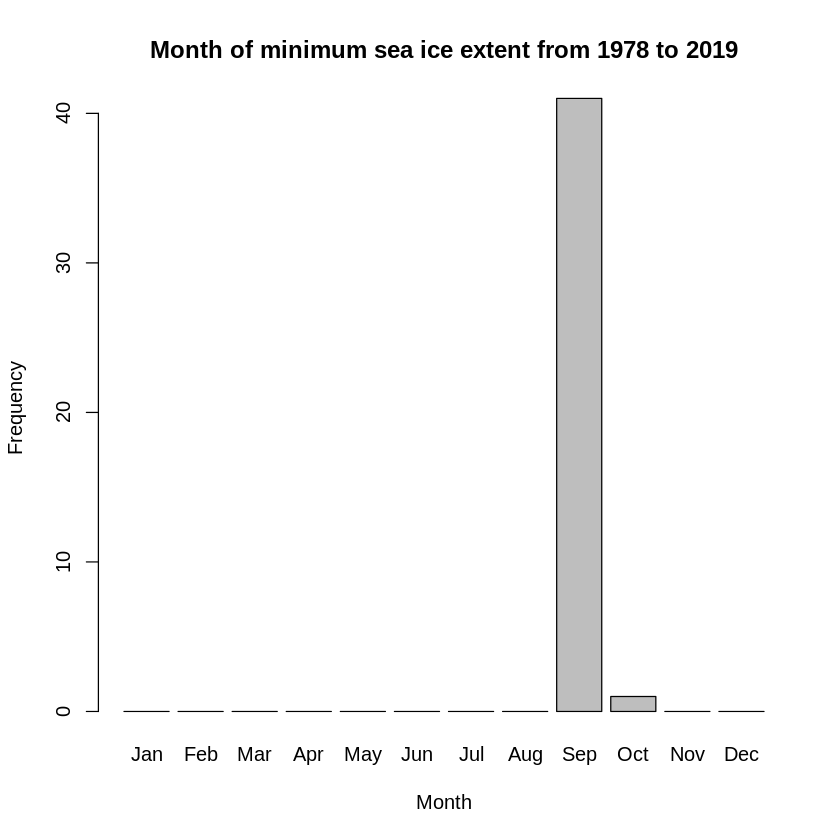

In [6]:
# Barplot for the minimum extent months frequency
barplot(min.month.freq,names.arg=month.vec,xlab="Month", ylab="Frequency",
       main = "Month of minimum sea ice extent from 1978 to 2019")

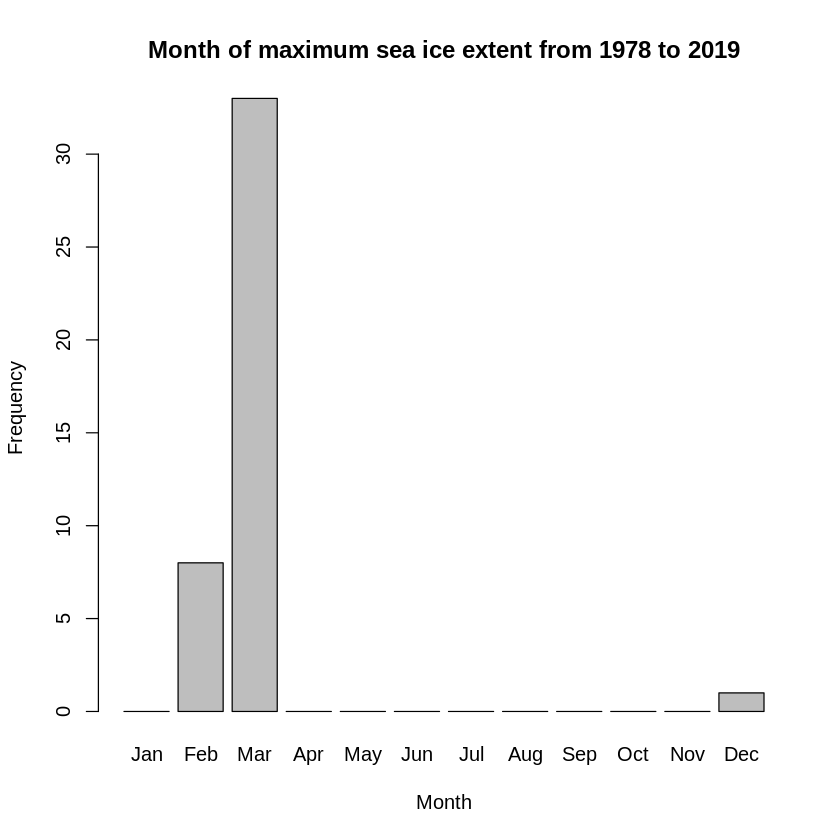

In [7]:
# Barplot for the maximum extent months frequency
barplot(max.month.freq,names.arg=month.vec,xlab="Month", ylab="Frequency",
       main = "Month of maximum sea ice extent from 1978 to 2019")

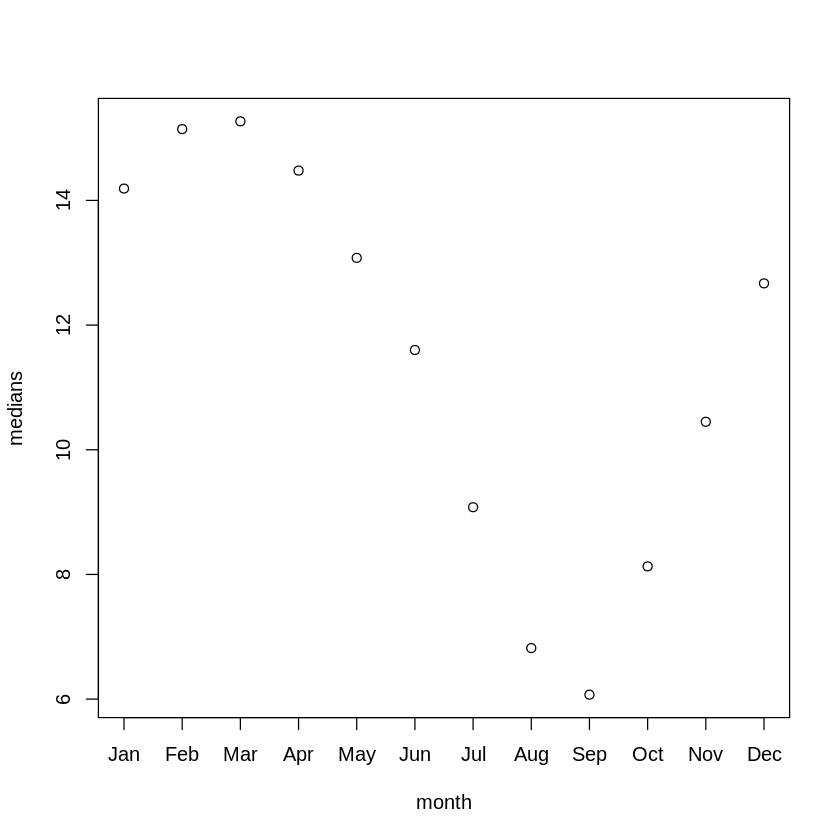

In [45]:
# Plot, month by month, the median value of the extent

month <- 1:12

month.vec <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

medians <- unlist(lapply(split(ice.daily, ice.daily$Month), function(x){
    return(median(x$Extent))
}), use.names = FALSE)

my.table <- as.data.frame(cbind(month,medians))

plot(month, medians, xaxt = "n")
axis(side = 1, at = month, labels = month.vec)


In [22]:
?ggplot

In [2]:
?tapply